# ``Box Plot``

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
nba=pd.read_csv('nba.csv')
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [54]:
nba['Height']= nba['Height'].str.replace('-','.')
nba['Height']=nba['Height'].astype(float)
nba['Height']

0      6.2
1      6.6
2      6.5
3      6.5
4      6.1
      ... 
453    6.3
454    6.1
455    7.3
456    7.0
457    NaN
Name: Height, Length: 458, dtype: float64

In [55]:
nba.dropna(inplace=True)

In [70]:
def find_outliers(series):
    q1=series.describe()['25%']
    q2=series.describe()['50%']
    q3=series.describe()['75%']
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outliers=[i for i in series if i<lower_bound or i>upper_bound]
    # outliers=[]
    
    return outliers

In [57]:
print(find_outliers(nba['Salary']))

[]


In [58]:
nba['Salary'].min()

55722.0

In [59]:
outlier_salary=find_outliers(nba['Salary'])

In [60]:
nba[nba['Salary'].isin(outlier_salary)].sort_values('Salary')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


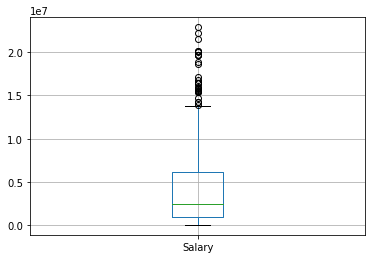

In [61]:
nba.boxplot('Salary')

{'whiskers': [<matplotlib.lines.Line2D at 0x22bbcd55070>,
 'caps': [<matplotlib.lines.Line2D at 0x22bbf26d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bbd6b7970>],
 'medians': [<matplotlib.lines.Line2D at 0x22bbf2718b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bbf2741c0>],
 'means': []}

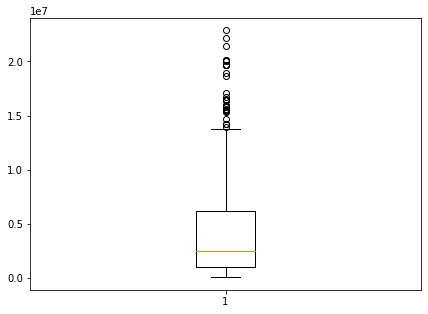

In [62]:
plt.figure(figsize=(7,5))
plt.boxplot(nba['Salary'])

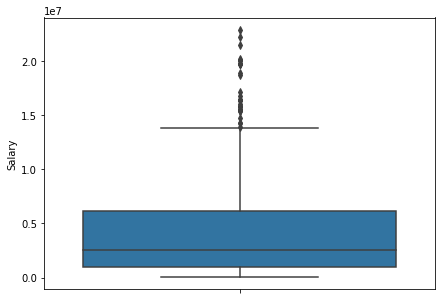

In [63]:
plt.figure(figsize=(7,5))
sns.boxplot(y='Salary',data=nba)
plt.show()

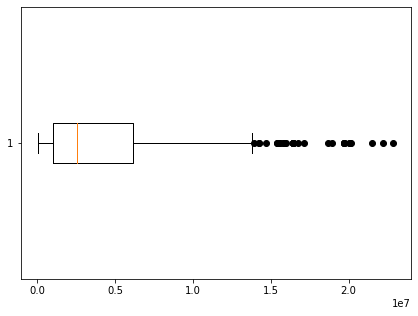

In [64]:
plt.figure(figsize=(7,5))
plt.boxplot(nba['Salary'],0,'k',0)
plt.show()

## Quiz
<img src=excersice.png>

In [98]:
age_out= nba[nba['Age'].isin(find_outliers(nba['Age']))]
height_out=nba[nba['Height'].isin(find_outliers(nba['Height']))]
weight_out=nba[nba['Weight'].isin(find_outliers(nba['Weight']))]
age_out_list=find_outliers(nba['Age'])
height_out_list=find_outliers(nba['Height'])
weight_out_list=find_outliers(nba['Weight'])
ahw=nba[(nba['Age'].isin(age_out)) | (nba['Height'].isin(height_out)) | (nba['Weight'].isin(weight_out))]
ahw2=nba[(nba['Age'].isin(age_out_list))|(nba['Height'].isin(height_out_list))|(nba['Weight'].isin(weight_out_list))]


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
101,Paul Pierce,Los Angeles Clippers,34.0,SF,38.0,6.70,235.0,Kansas,3376000.0
256,Jason Terry,Houston Rockets,31.0,SG,38.0,6.20,185.0,Arizona,947276.0
259,Chris Andersen,Memphis Grizzlies,7.0,PF,37.0,6.10,245.0,Blinn College,5000000.0
261,Vince Carter,Memphis Grizzlies,15.0,SG,39.0,6.60,220.0,North Carolina,4088019.0
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6.11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6.30,200.0,Utah,250750.0
420,Nazr Mohammed,Oklahoma City Thunder,13.0,C,38.0,6.10,250.0,Kentucky,222888.0


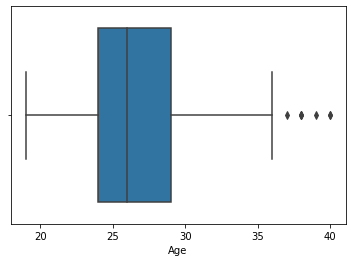

In [90]:
display(age_out)
display(sns.boxplot(nba['Age']))

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
22,Shane Larkin,Brooklyn Nets,0.0,PG,23.0,5.11,175.0,Miami (FL),1500000.0
130,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5.11,175.0,Missouri,55722.0
203,Ty Lawson,Indiana Pacers,10.0,PG,28.0,5.11,195.0,North Carolina,211744.0


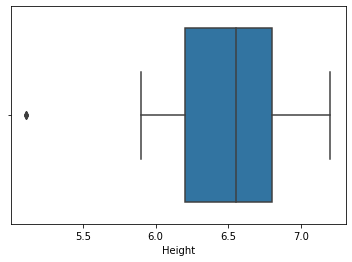

In [91]:
display(height_out)
display(sns.boxplot(nba['Height']))

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


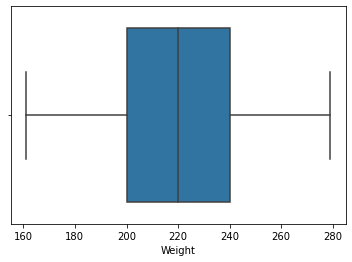

In [92]:
display(weight_out)
display(sns.boxplot(nba['Weight']))

In [99]:
display(ahw)
display(ahw2)
# sns.boxplot([nba['Age'],nba['Height'],nba['Weight']])


,Name,Team,Number,Position,Age,Height,Weight,College,Salary


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
22,Shane Larkin,Brooklyn Nets,0.0,PG,23.0,5.11,175.0,Miami (FL),1500000.0
101,Paul Pierce,Los Angeles Clippers,34.0,SF,38.0,6.70,235.0,Kansas,3376000.0
130,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5.11,175.0,Missouri,55722.0
203,Ty Lawson,Indiana Pacers,10.0,PG,28.0,5.11,195.0,North Carolina,211744.0
256,Jason Terry,Houston Rockets,31.0,SG,38.0,6.20,185.0,Arizona,947276.0
259,Chris Andersen,Memphis Grizzlies,7.0,PF,37.0,6.10,245.0,Blinn College,5000000.0
261,Vince Carter,Memphis Grizzlies,15.0,SG,39.0,6.60,220.0,North Carolina,4088019.0
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6.11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6.30,200.0,Utah,250750.0
420,Nazr Mohammed,Oklahoma City Thunder,13.0,C,38.0,6.10,250.0,Kentucky,222888.0


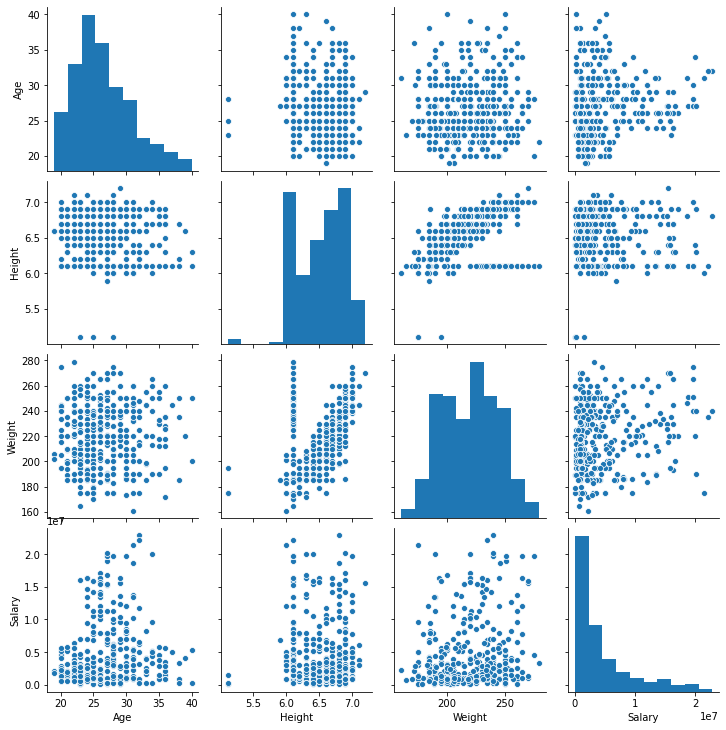

In [100]:
sns.pairplot(nba['Age Height Weight Salary'.split()])

In [1]:
usedcar={'merk': ['BMW', 'Mercy', 'Mercy', 'BMW', 'Porsche', 'Porsche', 'BMW', 'Porsche', 'BMW', 'Mercy']}